# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import gym
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name="Reacher_Linux_NoVis/Reacher.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [11]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

***Goal:*** The agent must achieve an average award of +30 in over 100 episodes. In this report, I will be using a single Reacher.

### 5. Learning Model Training Description

The agent uses a standard Deep Deterministic Policy Gradient (DDPG) model with Experience Replay. Both Actor and Critic (as well as their respective local and target networks) have two hidden layers, with first one (fc1) having 400 units and second one (fc2) having 300 units. There is also a batch normalization function (bn1) after fc1. Additionally, I have made an adjustment regarding the OUNoise, replacing the following line:

`dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])`

with:

`dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(len(x))`
This is to allow a normally distributed RNG instead of a uniformally distributed one to enable most consistent learning. Source: https://knowledge.udacity.com/questions/22843

Additional descriptions of the hyptermeters will be breakdown in the ***Attempt*** sections below.


In [6]:
from agent import DDPG
agent = DDPG(state_size=state_size, action_size=action_size, random_seed=2)

In [7]:
def train(n_episodes=100, max_t=1000):
    """Deep Deterministic Policy Gradiant.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []      # initialize the score
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)  # select an action (no eps unlike in DQN)
            env_info = env.step(action)[brain_name]  # send the action to env
            next_state = env_info.vector_observations[0]  # get the next state
            reward = env_info.rewards[0]  # get the reward
            done = env_info.local_done[0]  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores

### 6. Attempt #1
My first actually successful attempt contains the following hypermeters:
* `BUFFER_SIZE` = 10000 (1e5)
* `BATCH_SIZE` = 128
* `GAMMA` = 0.99
* `TAU` = 0.001
* `LR_ACTOR` = 0.0002  (learning rate of actor) 
* `LR_CRITIC` = 0.0002 (learning rate of critic)
* `WEIGHT_DECAY` = 0   (L2) 
* `UPDATE_EVERY` = 20
* `UPDATE_AMOUNT` = 10

`UPDATE_EVERY` and `UPDATE_AMOUNT` are derived from Udacity's Benchmark Implementation Attempt 4:
https://classroom.udacity.com/nanodegrees/nd893/parts/286e7d2c-e00c-4146-a5f2-a490e0f23eda/modules/089d6d51-cae8-4d4b-84c6-9bbe58b8b869/lessons/5b822b1d-5c89-4fd5-9b52-a02ddcfd3385/concepts/59c1f0b0-589a-43a5-ae27-fcb7f5a25e08

In [8]:
scores = train(n_episodes=500)

Episode 100	Average Score: 2.70
Episode 200	Average Score: 10.65
Episode 300	Average Score: 18.99
Episode 400	Average Score: 24.97
Episode 446	Average Score: 30.06
Environment solved in 346 episodes!	Average Score: 30.06


Environment solved in ***446*** episodes.

In [9]:
# saving the successful agent's model weights as a checkpoint file
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor1.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic1.pth')

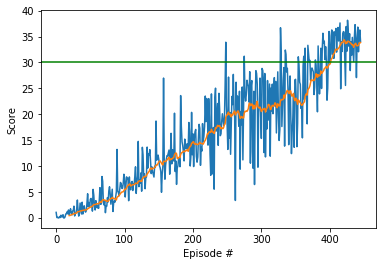

In [19]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), pd.DataFrame(scores).rolling(20).mean())
plt.ylabel('Score')
plt.xlabel('Episode #')
# goal line
plt.axhline(y=30, color='g')
plt.show()

### 7. Attempt #2
For the second attempt, I will be modifying only the `BUFFER_SIZE` the `BATCH_SIZE` parameters:
* `BUFFER_SIZE` = 100000 (1e6)
* `BATCH_SIZE` = 512

By enlarging the sample batch size from a larger buffer pool, I hope this improves learning stability by mitigating idiosyncratic variances for each batch sample. 

In [8]:
scores = train(n_episodes=500)

Episode 100	Average Score: 4.76
Episode 200	Average Score: 24.10
Episode 228	Average Score: 30.11
Environment solved in 228 episodes!	Average Score: 30.11


Environment solved in ***228*** episodes, which is almost twice as efficient as Attempt 1.

In [9]:
# saving the successful agent's model weights as a checkpoint file
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor2.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic2.pth')

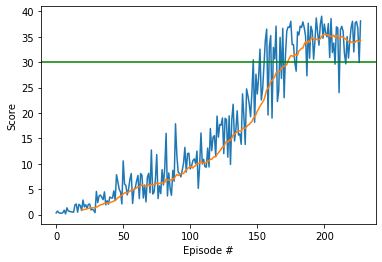

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), pd.DataFrame(scores).rolling(20).mean())
plt.ylabel('Score')
plt.xlabel('Episode #')
# goal line
plt.axhline(y=30, color='g')
plt.show()

### 7. Attempt #3
Finally for both Actor and Critic models, instead of using the ReLu activation functions, I will be replacing all of them with Leaky ReLu instead. This can offest the “dying ReLU” problem due to neurons getting stuck with 0 values.

Source: https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

In [8]:
scores = train(n_episodes=500)

Episode 100	Average Score: 5.26
Episode 185	Average Score: 30.04
Environment solved in 185 episodes!	Average Score: 30.04


Environment solved in ***185*** episodes, which is 43 episodes more efficient than in Attempt 2. The graph belows minimal oscillation once the score hits the 30 mark threshold.

In [9]:
# saving the successful agent's model weights as a checkpoint file
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor3.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic3.pth')

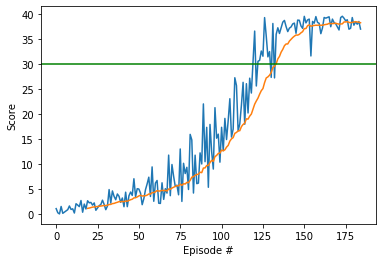

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), pd.DataFrame(scores).rolling(20).mean())
plt.ylabel('Score')
plt.xlabel('Episode #')
# goal line
plt.axhline(y=30, color='g')
plt.show()

### 8. Ideas for Future Work

1) ***Prioritize Experience Replay***: Like the Navigation project, popularizing the Experiences with largest errors can help with fastest laerning.

2) ***Learning Rates***: From this experience, the actor and critic learning rates does play a significant role of the rate of score improvement. I could further tune those to performance better, while preventing it from overshooting it.  

3) ***GAE***: It can be good to optimate the n-steps before updating, unlike my abitrary 20 steps. This is what Generalized Advantage Estimation (GAE) provides with the lamdba function

4) ***D4PG***: Distributed Distributional Deep Deterministic Policy Gradient (D4PG) that is apparently an improvement of DDPG in terms of coping with more complicated continuous environments.

5) ***MADDPG***: Muti-Agent Deep Deterministic Policy Gradient (MADDPG) can be utilizes to tackle the 20 Reachers problem.